In [6]:
import pandas as pd
import csv
import os
import os.path
import pymorphy2
import regex as re
import markus
from collections import Counter
import string
import main
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
from pymystem3 import Mystem

import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

c:\Users\User\Python project\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Пункт 1 и Пункт 2

In [5]:
column_name = ['class_mark', 'text_review', 'count_words']

def add_to_list(txt_name: list, text_reviews: list, name_class: list) -> list:
    '''возвращает два списка: один с отзывами, другой с меткой класса'''
    for i in range(2000):

        with open(txt_name[i], 'r', encoding='utf-8') as f:
            data = f.read()
            text_reviews.append(data)
            class_name = str(txt_name[i]).split('\\')[1]
            name_class.append(class_name)

    return text_reviews, name_class

def add_to_dataframe() -> pd.DataFrame:
    '''записывает в dataframe текст отзыва и метку класса в два столбца'''
    filename = "dataset.csv"
    text_reviews = []
    name_class = []
    txt_name = []
    data_dict = {}

    with open(filename, encoding="utf-8") as f:
        reader = csv.reader(f, delimiter=' ')
        for row in reader:
            if row[1] != 'Relative path':
                txt_name.append(str(row[1])[3:])

    text_reviews, name_class = add_to_list(txt_name, text_reviews, name_class)

    column_name = ['class_mark', 'text_review', 'count_words']
    data_dict[column_name[0]] = name_class
    data_dict[column_name[1]] = text_reviews
    reviews_df = pd.DataFrame(data_dict)
    return reviews_df

reviews_df = add_to_dataframe()
print(reviews_df)
reviews_df.to_csv('datafraem.csv')

     class_mark                                        text_review
0           bad  Оно\nМои фильмы из помойки!Мам, а у нас еще ос...
1           bad  Оно\nМои фильмы из помойки!Сразу скажу, что я ...
2           bad  Оно\nМои фильмы из помойки!Если сравнивать ста...
3           bad  Оно\nМои фильмы из помойки!— Прошу меня извини...
4           bad  Оно\nМои фильмы из помойки!Для начала, опишу х...
...         ...                                                ...
1995       good  Чужой\nНекоторые фильмы становятся легендарным...
1996       good  Чужой\nНадо же так снять фильм, без отрыва от ...
1997       good  Чужой\nДинамичное, захватывающее, эпичное, вел...
1998       good  Чужой\nНедавно пересмотрел данное творение. Уд...
1999       good  Чужой\nМог ли в 1979 году Ридли Скотт полагать...

[2000 rows x 2 columns]


Пункт 3


In [8]:
data = pd.read_csv('datafraem.csv')
data.head()

,Unnamed: 0,class_mark,text_review
0,0,bad,"Оно\nМои фильмы из помойки!Мам, а у нас еще ос..."
1,1,bad,"Оно\nМои фильмы из помойки!Сразу скажу, что я ..."
2,2,bad,Оно\nМои фильмы из помойки!Если сравнивать ста...
3,3,bad,Оно\nМои фильмы из помойки!— Прошу меня извини...
4,4,bad,"Оно\nМои фильмы из помойки!Для начала, опишу х..."


In [1]:
def check_nan(reviews_df: pd.DataFrame, column_name:str) -> bool:
    '''Проверяем на пустоту в dataframe'''
    return reviews_df[column_name].isnull().values.any()

print(markus.check_nan(reviews_df, column_name[0]))
print(markus.check_nan(reviews_df, column_name[1]))

NameError: name 'pd' is not defined

Пункт 4

In [ ]:
count_word = markus.count_words_in_text(reviews_df, column_name[1])
reviews_df[column_name[2]] = pd.Series(count_word)
print(reviews_df)

Пункт 5

Пункт 9

In [4]:
lemma = []
lemma = markus.lemmatize_for_class_mark(reviews_df, 'good')
lemma = lemma.sort()

word_dict = Counter(lemma)
word_dict = dict(word_dict)
word_dict_upd = {}
bad_functors_pos = {'INTJ', 'PRCL', 'CONJ', 'PREP', 'NPRO'}
bad_words = {'этот', 'мой', 'наш', 'один', 'который', 'весь', 'быть'}
verb_functors_pos = {'VERB', 'INFN'}
good_functors_pos = {'ADJS', 'ADJF'}
for key, value in word_dict.items(): 
    markus.pos(key)   
    if value > 500 and  markus.pos(key) in verb_functors_pos and key != ' ' and key not in bad_words:
        word_dict_upd[key] = value

print(word_dict_upd)

NameError: name 'markus' is not defined

Пункт 10

NameError: name 'word_dict_upd' is not defined

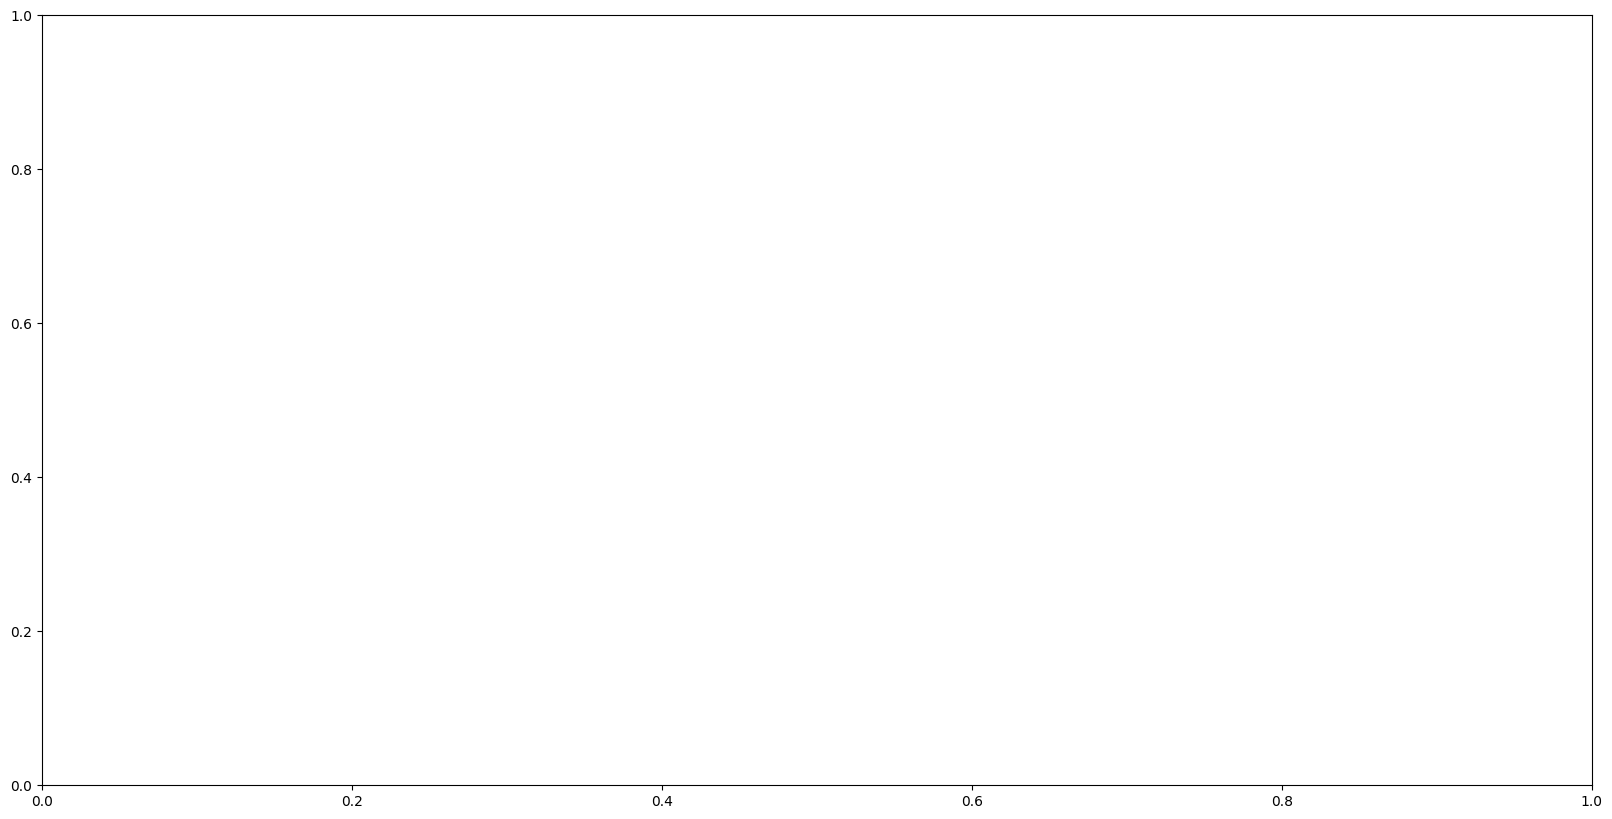

In [3]:
from matplotlib import pyplot as plt
import numpy as np

def lemmatize(text) -> list:
    morph = pymorphy2.MorphAnalyzer()
    new_list = []
    tt = str.maketrans(dict.fromkeys(string.punctuation))
    elem = text.translate(tt)
    if elem is not None:
        list_words = elem.split()
    for word in list_words:
        p = morph.parse(word)[0]
        new_list.append(p.normal_form)
    return new_list

def create_histogram(reviews_df: pd.DataFrame, label: str) -> plt.Figure:

    dict = {}
    list = []
    reviews_df = reviews_df[reviews_df['class_mark'] == label][['text_review']]
    for text in reviews_df['text_review']:
        list_new = lemmatize(text)
    for word in list_new:
        if word not in dict.keys():
            dict[word] = list_new.count(word)
            list.append(list_new.count(word))
    return list, dict

reviews_df = markus.add_to_dataframe()

list_t, dict = create_histogram(reviews_df, 'good')

plt.figure(figsize=(30, 5))
plt.ylabel('Количество слов')
plt.title('Гистограмма')

new = []
for elem in dict:
    print(elem)
new.append(elem)
plt.hist(list_t[:20], bins=len(list_t), color='blue', edgecolor='black')
plt.xticks(np.arange(len(list_t[:20])), new[:20],rotation=90, horizontalalignment='left')

plt.show()
